In [2]:
import time
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt


import torch.optim
from MADDPG_deepQnet import SAC

from MADDPG_evaluate import do_eval, do_test
import matplotlib.pyplot as plt

from torchsummary import summary

device = 'cpu'
from scipy.stats import zscore, rankdata

def my_zscore(x):
    return zscore(x, ddof=1), np.mean(x, axis=0), np.std(x, axis=0, ddof=1)

ModuleNotFoundError: No module named 'MADDPG_deepQnet'

In [ ]:
def sliding_mean(data_array, window=1):
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)
    return np.array(new_list)

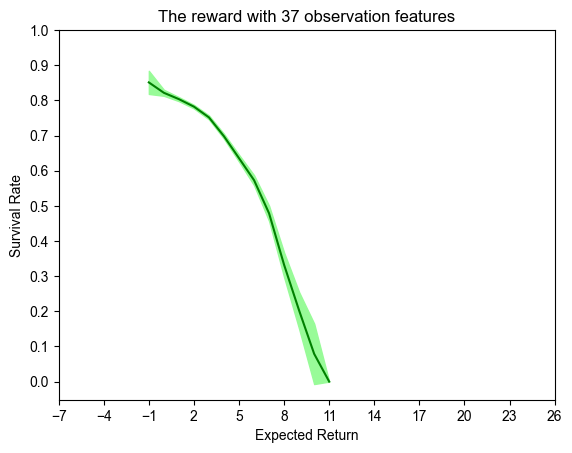

In [ ]:
if __name__ == '__main__':
    from scipy.stats import sem

    agent_bQ = np.load('D:/Trek_AI/optimal_model/ID3QNE-algorithm/agent_bQ.npy')
    phys_bQ = np.load('D:/Trek_AI/optimal_model/ID3QNE-algorithm/phys_bQ.npy')
    shencunlv1 = np.load('D:/Trek_AI/optimal_model/ID3QNE-algorithm/shencunlv.npy')
    shencunlv = 1 - shencunlv1
    agent_b = agent_bQ[:]
    phys_b = phys_bQ[:]

    max_agent_b = max(agent_b)
    min_agent_b = min(agent_b)

    max_phys_b = max(phys_b)
    min_phys_b = min(phys_b)

    bin_medians = []  
    mort = []
    mort_std = []

    i = -7
    while i <= 25:
        shengcun_bool = (agent_bQ[:] > i - 0.5) & (agent_bQ[:] < i + 0.5)
        count = shencunlv[shengcun_bool == True]
        try:
            res = sum(count) / float(len(count))
            if len(count) >= 2:
                bin_medians.append(i)
                mort.append(res)
                mort_std.append(sem(count))
        except ZeroDivisionError:
            pass
        i += 1
    i = -7
    phys_bin_medians = []
    phys_mort = []
    phys_mort_std = []

    while i <= 8:
        shengcun_bool = (phys_bQ[:] > i - 0.5) & (phys_bQ[:] < i + 0.5)
        count = shencunlv[shengcun_bool == True]

        try:
            res = sum(count) / float(len(count))
            if len(count) >= 2:
                phys_bin_medians.append(i)
                phys_mort.append(res)
                phys_mort_std.append(sem(count))
        except ZeroDivisionError:
            pass
        i += 1

    plt.plot(bin_medians, sliding_mean(mort), color='g')
    plt.fill_between(bin_medians, sliding_mean(mort) - 1 * mort_std,
                     sliding_mean(mort) + 1 * mort_std, color='palegreen')

    x_r = [i / 1.0 for i in range(-7, 27, 3)]
    y_r = [i / 10.0 for i in range(0, 11, 1)]
    plt.xticks(x_r, fontname="Arial")
    plt.yticks(y_r, fontname="Arial")

    plt.title('The reward with 37 observation features', fontname="Arial")
    plt.xlabel("Expected Return", fontname="Arial")
    plt.ylabel("Survival Rate", fontname="Arial")

    plt.show()
